# DAGMM Example
- In this example, anomaly scores of Mixture of Gaussian sample with 2 artificial "Outlier" are calculated.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import os


os.environ["CUDA_VISIBLE_DEVICES"]="1"
from dagmm import DAGMM

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Generate sample data
- Generate random samples from Mixture of Gaussian
- To check validity of logic, 2 aritificial "Outliers" is mixed to them.

In [4]:
data, _ = make_blobs(n_samples=1000, n_features=5, centers=5, random_state=123)

In [5]:
data[300] = [-1, -1, -1, -1, -1]
data[500] = [ 1,  0,  1,  1,  1]
ano_index = [300, 500]

### Scatter plot
Red Points are mixed "Outliers"

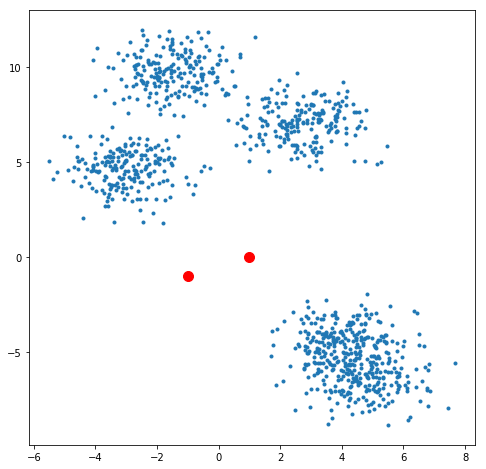

In [6]:
plt.figure(figsize=[8,8])
plt.plot(data[:,0], data[:,1], ".")
plt.plot(data[ano_index,0], data[ano_index,1], "o", c="r", markersize=10)

## DAGMM

In [7]:
tf.reset_default_graph()

In [8]:
model_dagmm = DAGMM(
    comp_hiddens=[16,8,1], comp_activation=tf.nn.tanh,
    est_hiddens=[8,4], est_activation=tf.nn.tanh, est_dropout_ratio=0.25,
    epoch_size=1000, minibatch_size=128
)

In [9]:
model_dagmm.fit(data)

 epoch 100/1000 : loss = 2.106
 epoch 200/1000 : loss = 1.807
 epoch 300/1000 : loss = 1.374
 epoch 400/1000 : loss = 1.060
 epoch 500/1000 : loss = 0.904
 epoch 600/1000 : loss = 0.830
 epoch 700/1000 : loss = 0.786
 epoch 800/1000 : loss = 0.747
 epoch 900/1000 : loss = 0.705
 epoch 1000/1000 : loss = 0.661


In [10]:
energy = model_dagmm.predict(data)

Text(0,0.5,'Number of Sample(s)')

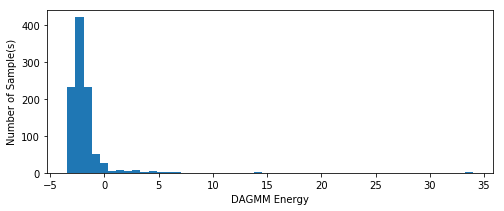

In [11]:
plt.figure(figsize=[8,3])
histinfo = plt.hist(energy, bins=50)
plt.xlabel("DAGMM Energy")
plt.ylabel("Number of Sample(s)")

Text(0,0.5,'Energy')

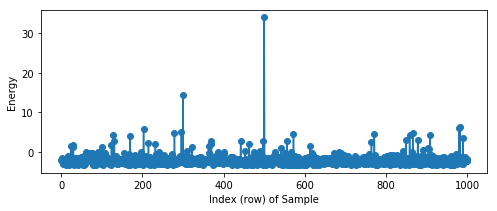

In [12]:
plt.figure(figsize=[8,3])
plt.plot(energy, "o-")
plt.xlabel("Index (row) of Sample")
plt.ylabel("Energy")

### Matrix Scatter Plot
- If an energy of sample exceeds 99th percentile of enegies, it is recognized as "Outlier".
    - In plot below, it is marked red "x". 
- Two "outlier" points are precisely recognized.

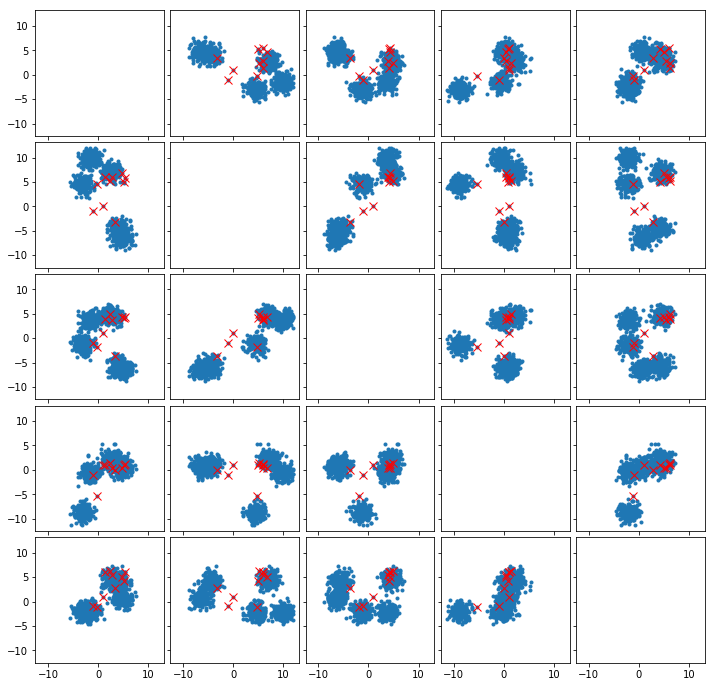

In [13]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=[12,12], sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

for row in range(5):
    for col in range(5):
        ax = axes[row, col]
        if row != col:
            ax.plot(data[:,col], data[:,row], ".")
            ano_index = np.arange(len(energy))[energy > np.percentile(energy, 99)]
            ax.plot(data[ano_index,col], data[ano_index,row], "x", c="r", markersize=8)